In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv('cardio_train.csv', index_col=[0]) # to eliminate the "Unnamed: 0" column

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.set_index('id', inplace=True)

### Ánalise Exploratória

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [6]:
df.nunique()

# Dados categóricos: gender, cholesterol, gluc, smoke, alco and active

age            8076
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

In [7]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


### Tratamento de Dados

##### 1. Dados Categóricos

In [9]:
# gender, cholesterol, gluc, smoke, alco and active
one_hot_gender = pd.get_dummies(df["gender"])
one_hot_gender = one_hot_gender.rename({ 1: 'male', 2: 'female' }, axis=1)

one_hot_cholesterol = pd.get_dummies(df["cholesterol"])
one_hot_cholesterol = one_hot_cholesterol.rename({ 1: 'cholesterol normal', 2: 'cholesterol above normal', 3: 'cholesterol well above normal' }, axis=1)

one_hot_gluc = pd.get_dummies(df["gluc"])
one_hot_gluc = one_hot_gluc.rename({ 1: 'glucose normal', 2: 'glucose above normal', 3: 'glucose well above normal' }, axis=1)

one_hot_smoke = pd.get_dummies(df["smoke"])
one_hot_smoke = one_hot_smoke.rename({ 0: 'not smoke', 1: 'smoke' }, axis=1)

one_hot_alco = pd.get_dummies(df["alco"])
one_hot_alco = one_hot_alco.rename({ 0: 'no alcohol intake', 1: 'alcohol intake' }, axis=1)

one_hot_active = pd.get_dummies(df["active"])
one_hot_active = one_hot_active.rename({ 0: 'not active', 1: 'active' }, axis=1)

df.drop(['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'],axis = 1, inplace=True)
df = df.join([one_hot_gender, one_hot_cholesterol, one_hot_gluc, one_hot_smoke, one_hot_alco, one_hot_active])
df

,age,height,weight,ap_hi,ap_lo,cardio,male,female,cholesterol normal,cholesterol above normal,cholesterol well above normal,glucose normal,glucose above normal,glucose well above normal,not smoke,smoke,no alcohol intake,alcohol intake,not active,active
id,,,,,,,,,,,,,,,,,,,,
0,18393,168,62.0,110,80,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1
1,20228,156,85.0,140,90,1,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,18857,165,64.0,130,70,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0
3,17623,169,82.0,150,100,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1
4,17474,156,56.0,100,60,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,168,76.0,120,80,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1
99995,22601,158,126.0,140,90,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1
99996,19066,183,105.0,180,90,1,0,1,0,0,1,1,0,0,1,0,0,1,1,0


##### 2. Mudar unidade das colunas age e height

In [10]:
df['age'] = df['age'].apply(lambda x: int(x / 365))
df

,age,height,weight,ap_hi,ap_lo,cardio,male,female,cholesterol normal,cholesterol above normal,cholesterol well above normal,glucose normal,glucose above normal,glucose well above normal,not smoke,smoke,no alcohol intake,alcohol intake,not active,active
id,,,,,,,,,,,,,,,,,,,,
0,50,168,62.0,110,80,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1
1,55,156,85.0,140,90,1,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,51,165,64.0,130,70,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0
3,48,169,82.0,150,100,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1
4,47,156,56.0,100,60,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52,168,76.0,120,80,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1
99995,61,158,126.0,140,90,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1
99996,52,183,105.0,180,90,1,0,1,0,0,1,1,0,0,1,0,0,1,1,0


### Seleção e Treino do Modelo

In [11]:
X = df.loc[:, df.columns != 'cardio']
Y = df['cardio']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [12]:
# para unir todos os reports de cada modelo e poder comparar melhor depois

reports = {}

#### 1. Decision Tree

In [13]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

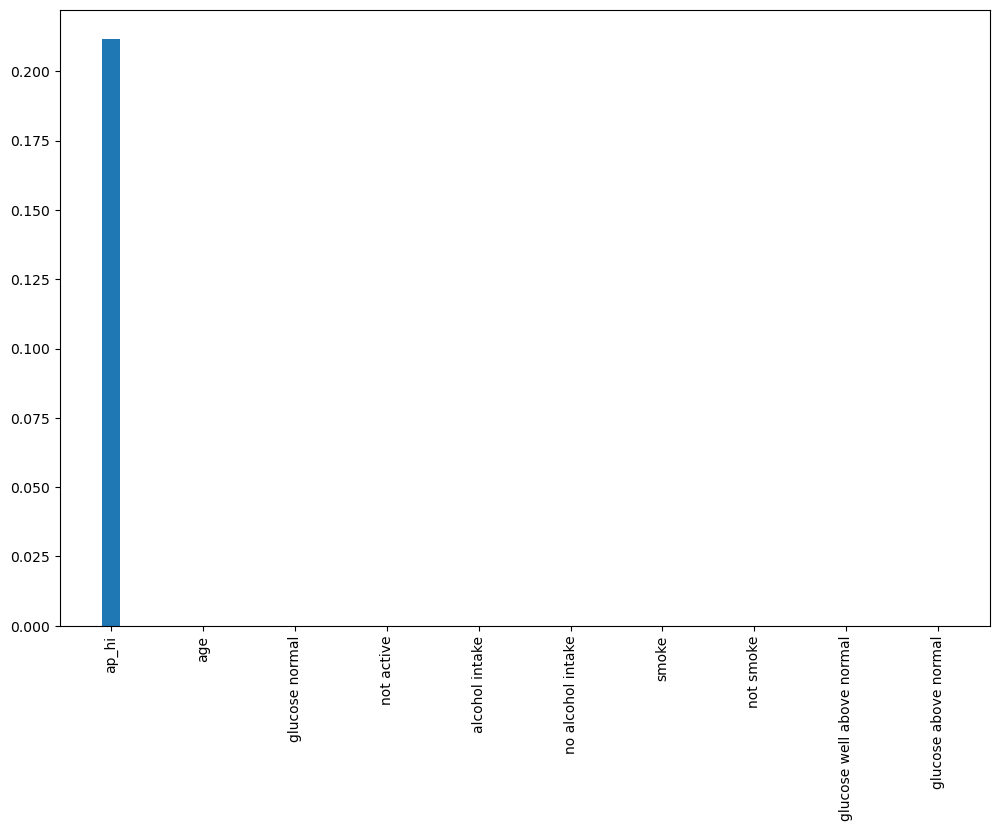

In [14]:
permutation_importance_mean = permutation_importance(dt, x_test, y_test, n_repeats=10, n_jobs=2).importances_mean

columns_importances = pd.Series(data=permutation_importance_mean, index=x_train.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))

plt.bar(columns_importances.index[:10], columns_importances.values[:10], width = 0.2)
plt.xticks(rotation=90)
plt.show()

In [15]:
prediction = dt.predict(x_test)

rmse = mean_squared_error(y_test, prediction) ** (1/2)

In [16]:
report_dict = classification_report(y_test, prediction, output_dict=True)['macro avg']
report_dict['accuracy'] = classification_report(y_test, prediction, output_dict=True)['accuracy']
report_dict['rmse'] = round(rmse, 2)

report_dict.pop('support')

report_dict = {key: round(value, 2) for key, value in report_dict.items()}

reports['Decision Tree'] = report_dict

#### 2. Decision Tree Tuned

In [17]:
params_dt= {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='accuracy', cv=10, n_jobs=-1)

grid_dt.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=2), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='accuracy')

In [18]:
grid_dt.best_params_

{'max_depth': 5, 'max_features': 0.8, 'min_samples_leaf': 0.04}

In [19]:
best_model = grid_dt.best_estimator_

prediction = best_model.predict(x_test)

rmse = mean_squared_error(y_test, prediction) ** (1/2)

In [20]:
report_dict = classification_report(y_test, prediction, output_dict=True)['macro avg']
report_dict['accuracy'] = classification_report(y_test, prediction, output_dict=True)['accuracy']
report_dict['rmse'] = round(rmse, 2)

report_dict.pop('support')

report_dict = {key: round(value, 2) for key, value in report_dict.items()}

reports['Decision Tree Tuned'] = report_dict

#### 3. Bagging

In [21]:
bg = BaggingClassifier(base_estimator=dt, n_estimators=50, n_jobs=4, oob_score=True)
bg.fit(x_train, y_train)

prediction = bg.predict(x_test)

rmse = mean_squared_error(y_test, prediction) ** (1/2)

test_accuracy = accuracy_score(y_test, prediction)
print('Test set accuracy: {:.3f}'.format(test_accuracy))

oob_accuracy = bg.oob_score_
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

Test set accuracy: 0.713
OOB accuracy: 0.714


In [22]:
report_dict = classification_report(y_test, prediction, output_dict=True)['macro avg']
report_dict['accuracy'] = classification_report(y_test, prediction, output_dict=True)['accuracy']
report_dict['rmse'] = round(rmse, 2)

report_dict.pop('support')

report_dict = {key: round(value, 2) for key, value in report_dict.items()}

reports['Bagging'] = report_dict

#### 4. Random Forest

In [23]:
rf = RandomForestClassifier(n_estimators=50, n_jobs=4, max_depth=2)
rf.fit(x_train, y_train)

prediction = rf.predict(x_test)

rmse = mean_squared_error(y_test, prediction) ** (1/2)

In [24]:
report_dict = classification_report(y_test, prediction, output_dict=True)['macro avg']
report_dict['accuracy'] = classification_report(y_test, prediction, output_dict=True)['accuracy']
report_dict['rmse'] = round(rmse, 2)

report_dict.pop('support')

report_dict = {key: round(value, 2) for key, value in report_dict.items()}

reports['Random Forest'] = report_dict

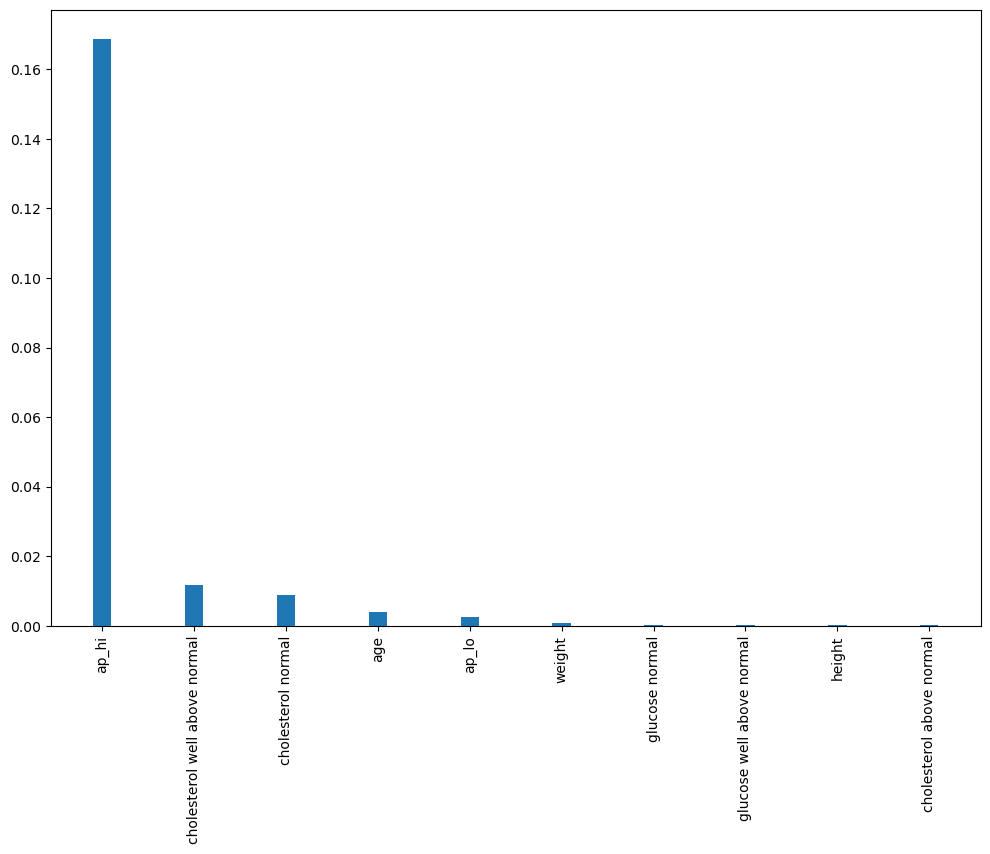

In [25]:
# embaralha os valores da coluna de cada feature, uma coluna por vez, e avalia qual foi a queda de performance do modelo após essa ação, quanto maior a queda, maior é a importância da feature

permutation_importance_mean = permutation_importance(rf, x_test, y_test, n_repeats=10, n_jobs=2).importances_mean

columns_importances = pd.Series(data=permutation_importance_mean, index=x_train.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))

plt.bar(columns_importances.index[:10], columns_importances.values[:10], width = 0.2)
plt.xticks(rotation=90)
plt.show()

#### 5. Random Forest Tuned

In [26]:
params_rf= {
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [30, 50, 70, 90],
    'min_samples_leaf': [0.1, 0.2],
    'max_features': ['log2', 'sqrt']
}

grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

grid_rf.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=2, n_estimators=50,
                                              n_jobs=4),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [30, 50, 70, 90]},
             scoring='neg_mean_squared_error')

In [27]:
grid_rf.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.1,
 'n_estimators': 90}

In [28]:
best_model = grid_rf.best_estimator_

prediction = best_model.predict(x_test)

rmse = mean_squared_error(y_test, prediction) ** (1/2)

In [29]:
report_dict = classification_report(y_test, prediction, output_dict=True)['macro avg']
report_dict['accuracy'] = classification_report(y_test, prediction, output_dict=True)['accuracy']
report_dict['rmse'] = round(rmse, 2)

report_dict.pop('support')

report_dict = {key: round(value, 2) for key, value in report_dict.items()}

reports['Random Forest Tuned'] = report_dict

#### 6. Gradient Boosting

In [30]:
gbt = GradientBoostingClassifier(n_estimators=50, max_depth=2)
gbt.fit(x_train, y_train)

prediction = gbt.predict(x_test)

rmse = mean_squared_error(y_test, prediction) ** (1/2)

In [31]:
report_dict = classification_report(y_test, prediction, output_dict=True)['macro avg']
report_dict['accuracy'] = classification_report(y_test, prediction, output_dict=True)['accuracy']
report_dict['rmse'] = round(rmse, 2)

report_dict.pop('support')

report_dict = {key: round(value, 2) for key, value in report_dict.items()}

reports['Gradient Boosting'] = report_dict

### Avaliação

In [32]:
df_reports = pd.DataFrame(reports)

df_reports

,Decision Tree,Decision Tree Tuned,Bagging,Random Forest,Random Forest Tuned,Gradient Boosting
precision,0.72,0.72,0.72,0.73,0.72,0.73
recall,0.71,0.72,0.71,0.73,0.72,0.73
f1-score,0.71,0.72,0.71,0.72,0.72,0.73
accuracy,0.71,0.72,0.71,0.73,0.72,0.73
rmse,0.54,0.53,0.54,0.52,0.53,0.52
